# Trading Hours, Spreads and Granularity - control and limit Trading Costs

__Goal__: Finding the right Trading hours and granularity to control and limit costs.

__Problem__: We can´t forecast returns with high accuracy -> In all cases where we predict market direction correctly, price movements/volatility must be large enough to cover trading costs.

__Solution__: <br> 
-Make Trades only during busy Trading hours (increased Volatility)<br>
-Lower Granularity leads to larger price movements per bar/candle (to cover Trading Costs) 


__Trade Off__: The higher the Granularity the more likely it is to find markets inefficiencies and mispricing.

## Getting and Preparing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

AttributeError: module 'numpy' has no attribute '__version__'

In [2]:
df = pd.read_csv("bid_ask.csv", parse_dates = ["time"], index_col = "time")

In [3]:
df

,volume,ask,bid,spread,mid
time,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840
...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93021 entries, 2019-07-21 21:00:00+00:00 to 2020-10-20 23:55:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  93021 non-null  int64  
 1   ask     93021 non-null  float64
 2   bid     93021 non-null  float64
 3   spread  93021 non-null  float64
 4   mid     93021 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.3 MB


In [5]:
df.index.tz

datetime.timezone.utc

In [6]:
df["NYTime"] = df.index.tz_convert("America/New_York")

In [7]:
df

,volume,ask,bid,spread,mid,NYTime
time,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00
...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00


In [8]:
df["hour"] = df.NYTime.dt.hour

In [9]:
df

,volume,ask,bid,spread,mid,NYTime,hour
time,,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00,17
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17
...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19


In [10]:
df["price_change_abs"] = df.mid.diff().abs()

In [11]:
df

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs
time,,,,,,,,
2019-07-21 21:00:00+00:00,12,1.12164,1.12131,0.00033,1.121475,2019-07-21 17:00:00-04:00,17,NaN
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185
...,...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19,0.000100
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19,0.000015
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19,0.000010


In [12]:
df.dropna(inplace = True)

## The best time to trade (Part 1)

In [13]:
by_hour = df.groupby("hour")[["volume", "spread", "price_change_abs"]].mean()
by_hour

,volume,spread,price_change_abs
hour,,,
0,71.264365,0.000144,0.000105
1,100.156001,0.000141,0.000135
2,277.867658,0.000133,0.000220
3,441.419231,0.000132,0.000281
4,393.620256,0.000130,0.000257
5,340.002052,0.000128,0.000231
6,314.227238,0.000128,0.000231
7,332.894872,0.000128,0.000241
8,453.958462,0.000136,0.000301


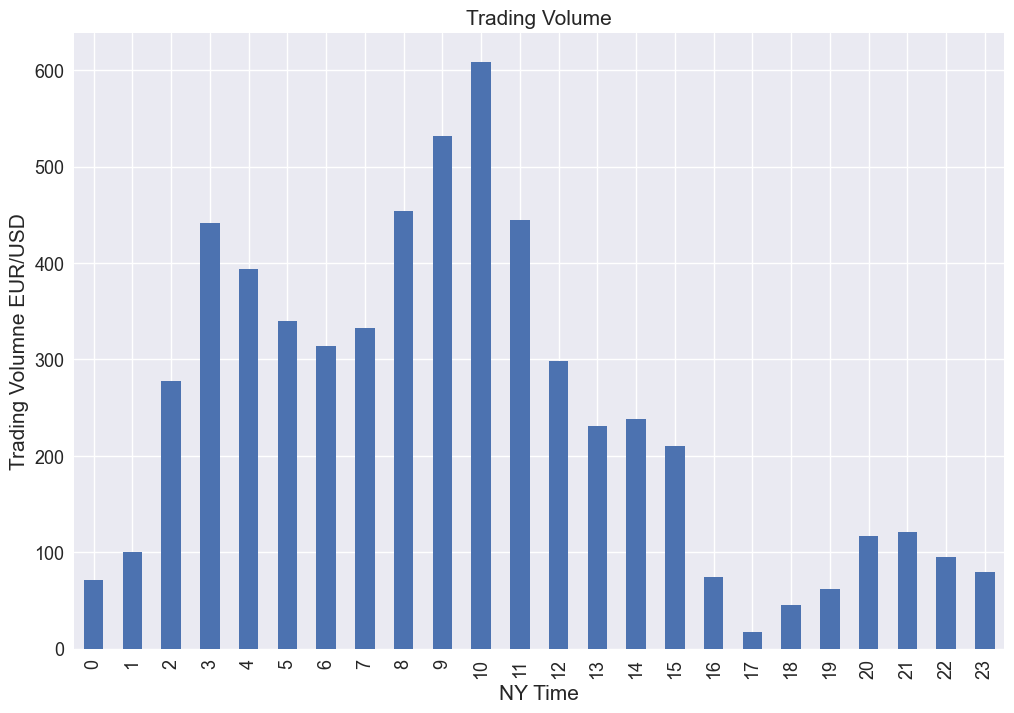

In [14]:
by_hour.volume.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Trading Volumne EUR/USD", fontsize = 15)
plt.title("Trading Volume", fontsize = 15)
plt.show()

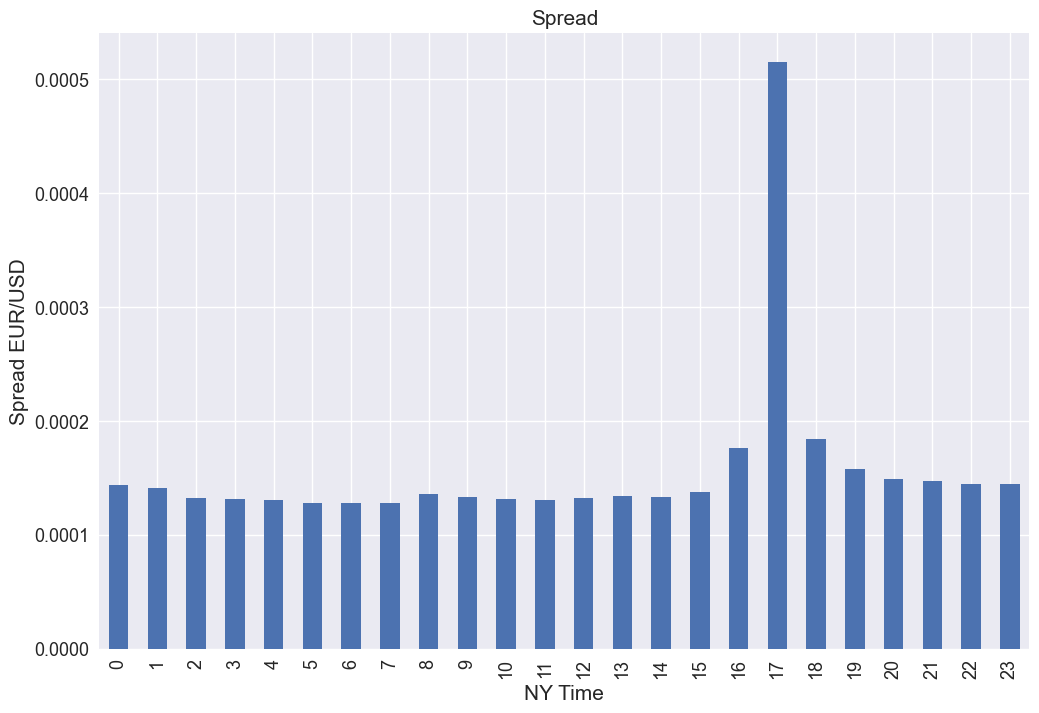

In [15]:
by_hour.spread.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Spread EUR/USD", fontsize = 15)
plt.title("Spread", fontsize = 15)
plt.show()

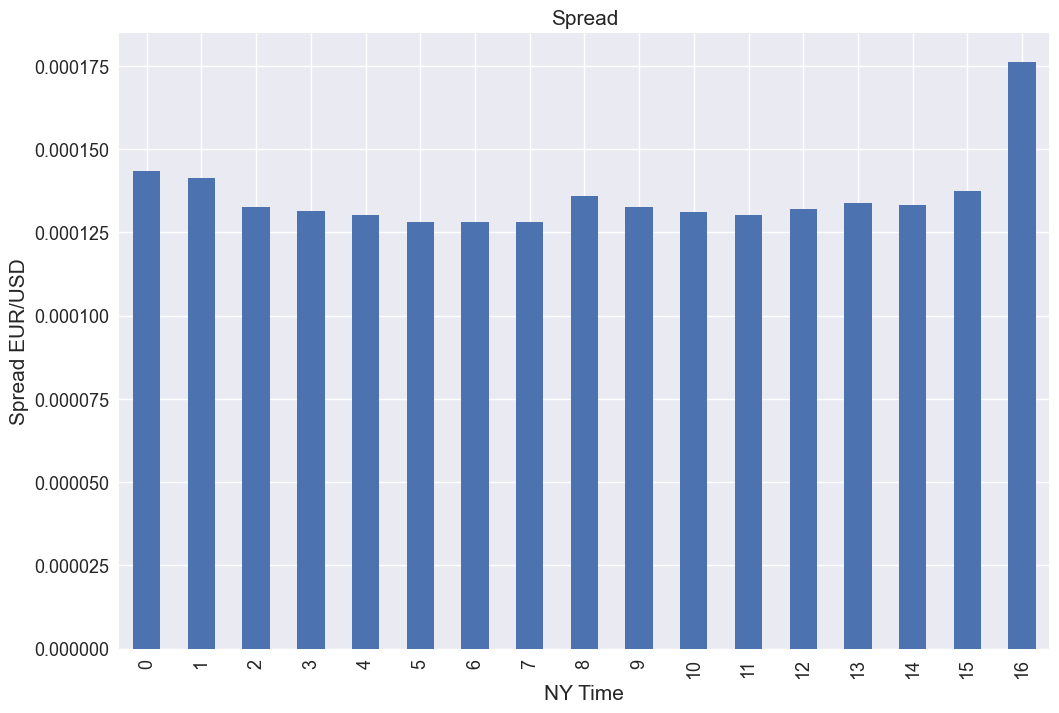

In [16]:
by_hour.loc[0:16, "spread"].plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Spread EUR/USD", fontsize = 15)
plt.title("Spread", fontsize = 15)
plt.show()

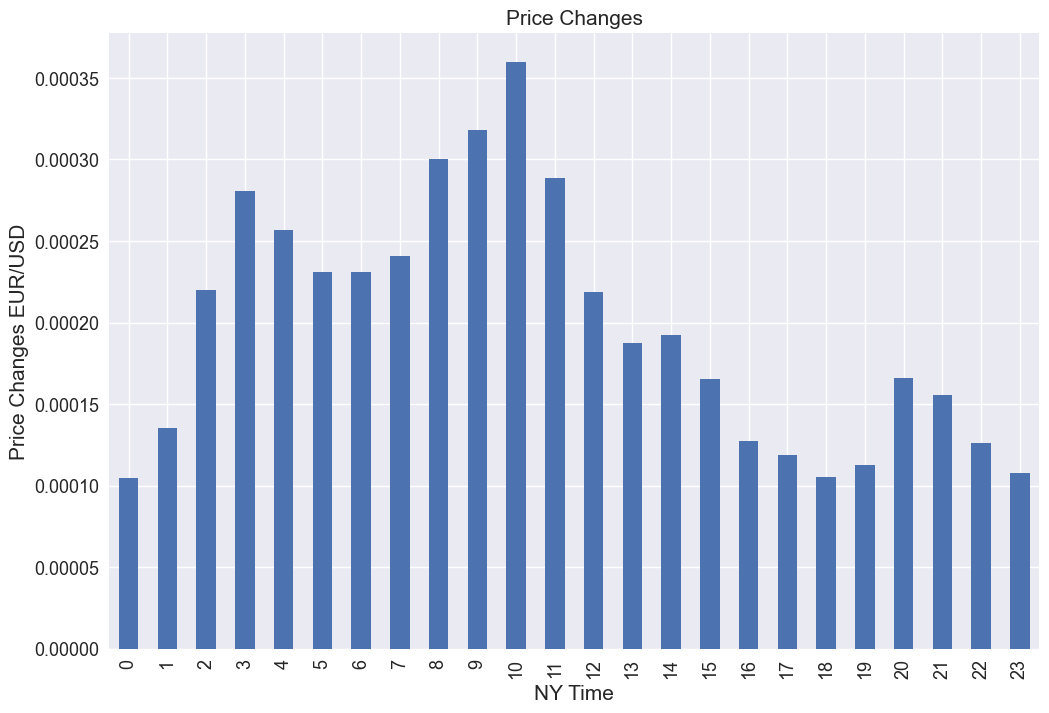

In [17]:
by_hour.price_change_abs.plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Price Changes EUR/USD", fontsize = 15)
plt.title("Price Changes", fontsize = 15)
plt.show()

## The best time to trade (Part 2)

In [18]:
df

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs
time,,,,,,,,
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185
2019-07-21 21:25:00+00:00,1,1.12201,1.12161,0.00040,1.121810,2019-07-21 17:25:00-04:00,17,0.000030
...,...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19,0.000100
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19,0.000015
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19,0.000010


In [19]:
df["cover_cost"] = df.price_change_abs > df.spread

In [20]:
df

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs,cover_cost
time,,,,,,,,,
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220,False
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025,False
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015,False
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185,False
2019-07-21 21:25:00+00:00,1,1.12201,1.12161,0.00040,1.121810,2019-07-21 17:25:00-04:00,17,0.000030,False
...,...,...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19,0.000100,False
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19,0.000015,False
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19,0.000010,False


In [21]:
df.groupby("hour").cover_cost.mean()

hour
0     0.239371
1     0.340786
2     0.563221
3     0.662051
4     0.635128
5     0.598872
6     0.619390
7     0.610000
8     0.652051
9     0.685385
10    0.735641
11    0.672051
12    0.570806
13    0.481016
14    0.470588
15    0.411220
16    0.260041
17    0.025450
18    0.147494
19    0.217995
20    0.389246
21    0.365340
22    0.299152
23    0.233960
Name: cover_cost, dtype: float64

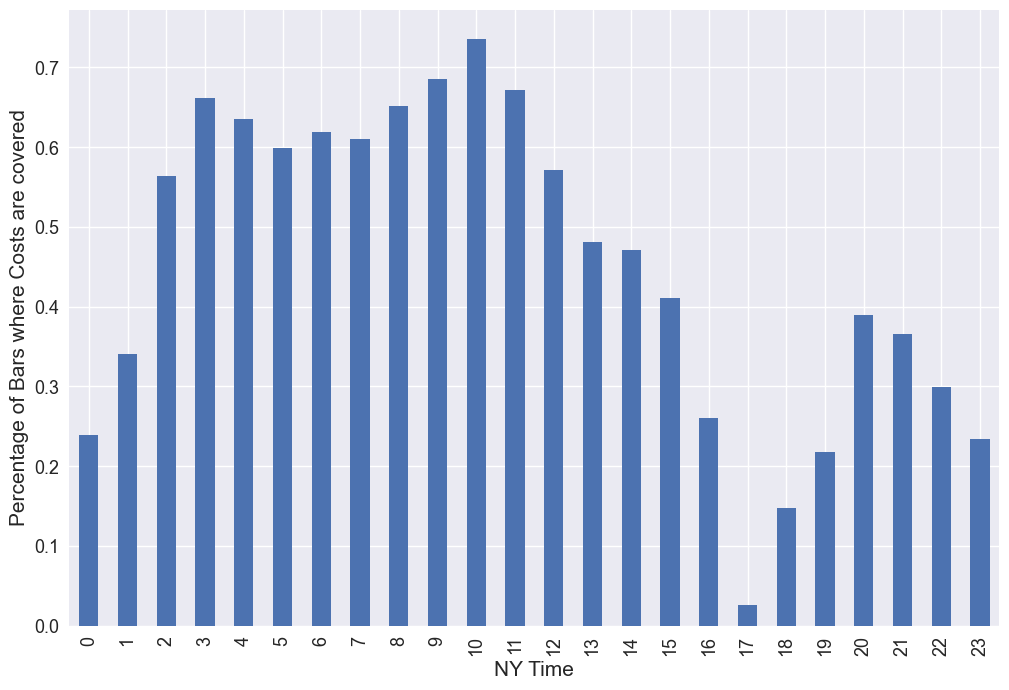

In [22]:
df.groupby("hour").cover_cost.mean().plot(kind = "bar", figsize = (12, 8), fontsize = 13)
plt.xlabel("NY Time", fontsize = 15)
plt.ylabel("Percentage of Bars where Costs are covered", fontsize = 15)
plt.show()

Busy Trading Hours for __EUR/USD__: from __2:00 am__ to __12:59 pm__ New York Time

## Proportional Trading Costs and Trading Hours

In [23]:
ptc = 0.00007

In [24]:
ptc

7e-05

In [25]:
df

,volume,ask,bid,spread,mid,NYTime,hour,price_change_abs,cover_cost
time,,,,,,,,,
2019-07-21 21:05:00+00:00,12,1.12182,1.12157,0.00025,1.121695,2019-07-21 17:05:00-04:00,17,0.000220,False
2019-07-21 21:10:00+00:00,1,1.12176,1.12158,0.00018,1.121670,2019-07-21 17:10:00-04:00,17,0.000025,False
2019-07-21 21:15:00+00:00,18,1.12190,1.12141,0.00049,1.121655,2019-07-21 17:15:00-04:00,17,0.000015,False
2019-07-21 21:20:00+00:00,9,1.12201,1.12167,0.00034,1.121840,2019-07-21 17:20:00-04:00,17,0.000185,False
2019-07-21 21:25:00+00:00,1,1.12201,1.12161,0.00040,1.121810,2019-07-21 17:25:00-04:00,17,0.000030,False
...,...,...,...,...,...,...,...,...,...
2020-10-20 23:35:00+00:00,81,1.18275,1.18261,0.00014,1.182680,2020-10-20 19:35:00-04:00,19,0.000100,False
2020-10-20 23:40:00+00:00,92,1.18276,1.18263,0.00013,1.182695,2020-10-20 19:40:00-04:00,19,0.000015,False
2020-10-20 23:45:00+00:00,101,1.18275,1.18262,0.00013,1.182685,2020-10-20 19:45:00-04:00,19,0.000010,False


In [26]:
df.spread.mean()

np.float64(0.00015465190281654777)

In [27]:
spread = df.loc[df.hour.between(2, 12), "spread"].mean()
spread

np.float64(0.00013103112250839954)

In [28]:
ptc = (spread/2) / df.mid.mean()
ptc

np.float64(5.8454351829187725e-05)

## The Impact of Granularity

In [29]:
def hours_granularity(freq = None):
    df = pd.read_csv("bid_ask.csv", parse_dates = ["time"], index_col = "time",
                     usecols = ["time", "spread", "mid"])
    if freq is not None:
        df = df.resample(freq).last().dropna()
    df["NYTime"] = df.index.tz_convert("America/New_York")
    df["hour"] = df.NYTime.dt.hour
    df["price_change_abs"] = df.mid.diff().abs()
    df["cover_cost"] = df.price_change_abs > df.spread
    
    df.dropna().groupby("hour").cover_cost.mean().plot(kind = "bar", figsize = (12, 8), fontsize = 13)
    plt.xlabel("NY Time", fontsize = 15)
    plt.ylabel("Cover Costs", fontsize = 15)
    plt.title("Granularity: {}".format(freq), fontsize = 18)
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95])
    plt.show()

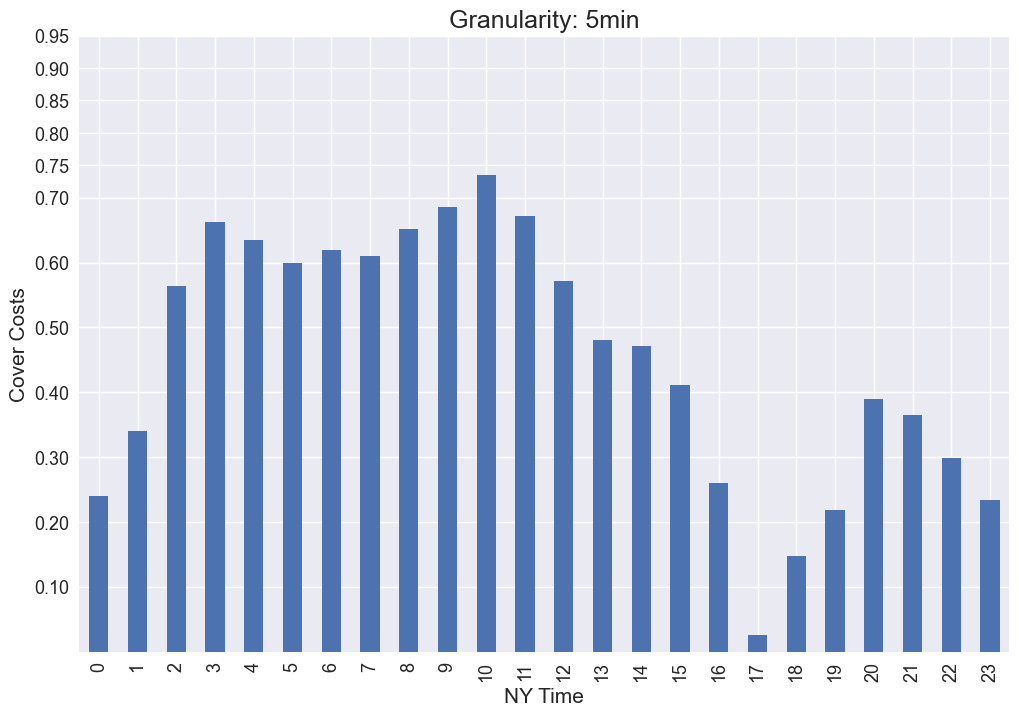

In [30]:
hours_granularity(freq = "5min")

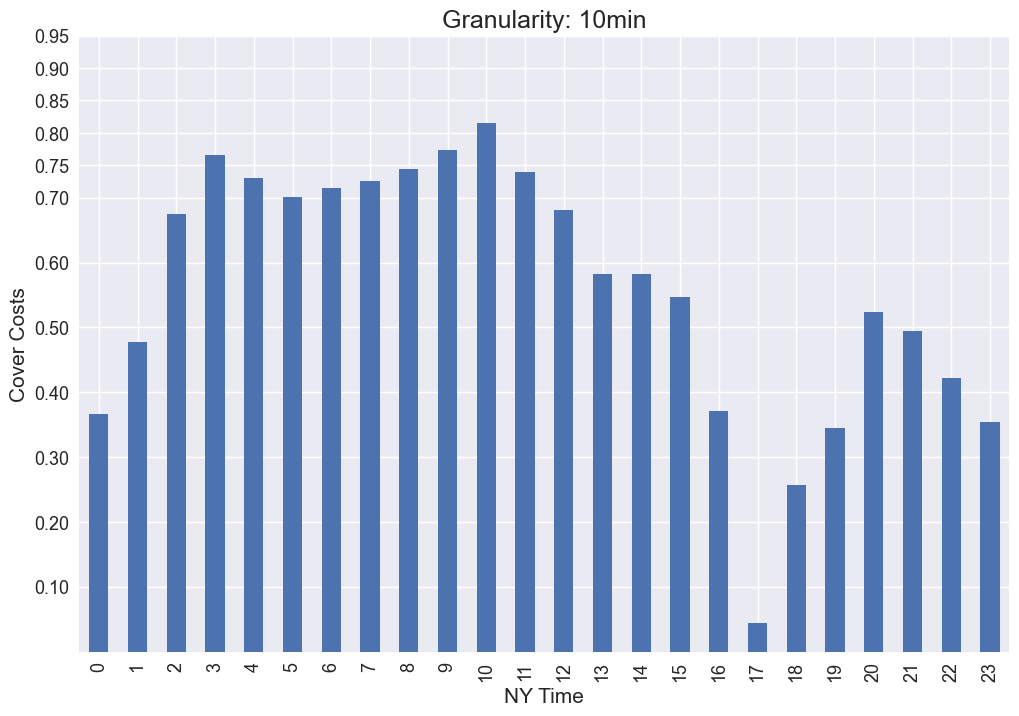

In [31]:
hours_granularity(freq = "10min")

In [ ]:
hours_granularity(freq = "20min")

In [ ]:
hours_granularity(freq = "30min")

In [ ]:
# hours_granularity(freq = "1H") # old

In [ ]:
hours_granularity(freq = "1h") # new (Pandas 3.x)